In [1]:
# Import library needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Read dataset
data = pd.read_csv('imo.csv')


In [3]:
# Display data
data_notna = data[data["label"].notna()]

# Reset index
data_notna.reset_index(drop=True, inplace=True)

X, y = data_notna["post_canonical"], data_notna["label"]

display(data_notna.sample(4))
print(f"{data_notna.shape}\n")

number_of_occurrences = [
    data_notna[data_notna['label'] == 'Algebra'].shape[0],
    data_notna[data_notna['label'] == 'Combinatorics'].shape[0],
    data_notna[data_notna['label'] == 'Geometry'].shape[0],
    data_notna[data_notna['label'] == 'Number Theory'].shape[0]
]
print(f"Algebra       = {number_of_occurrences[0]}")
print(f"Combinatorics = {number_of_occurrences[1]}")
print(f"Geometry      = {number_of_occurrences[2]}")
print(f"Number Theory = {number_of_occurrences[3]}")


,id_key,no,contest_category,contest_name,year,link,pdf,post_rendered,post_canonical,label
2809,10515,P4,International Contest,tournament_of_towns,20202021_tournament_of_towns,https://artofproblemsolving.com/community/c329...,https://artofproblemsolving.com/downloads/prin...,"The <img src=""//latex.artofproblemsolving.com/...",The $X{}$ pentomino consists of five $1\times1...,Combinatorics
2141,7385,C1,International Contest,jbmo_shortlists,2018_jbmo_shortlist,https://artofproblemsolving.com/community/c903...,https://artofproblemsolving.com/downloads/prin...,"A set <img src=""//latex.artofproblemsolving.co...",A set $S$ is called neighbouring if it has th...,Combinatorics
1613,4404,C5,International Contest,balkan_mo_shortlist,2010_balkan_mo_shortlist,https://artofproblemsolving.com/community/c111...,https://artofproblemsolving.com/downloads/prin...,"A train consist of <img src=""//latex.artofprob...",A train consist of $2010$ wagons containing go...,Combinatorics
1193,2874,12,International Contest,imo_longlists,1980_imo_longlists,https://artofproblemsolving.com/community/c401...,https://artofproblemsolving.com/downloads/prin...,"Find all pairs of solutions <span style=""white...","Find all pairs of solutions $(x,y)$: \[ x^3 +...",Number Theory


(2871, 10)

Algebra       = 683
Combinatorics = 565
Geometry      = 962
Number Theory = 661


Overall accuracy model:
Accuracy  = 89.565%
Precision = 89.535%
Recall    = 89.565%
F1-score  = 89.492%

Accuracy model for each label:
Algebra       = 87.857%
Combinatorics = 86.408%
Geometry      = 97.980%
Number Theory = 81.343%



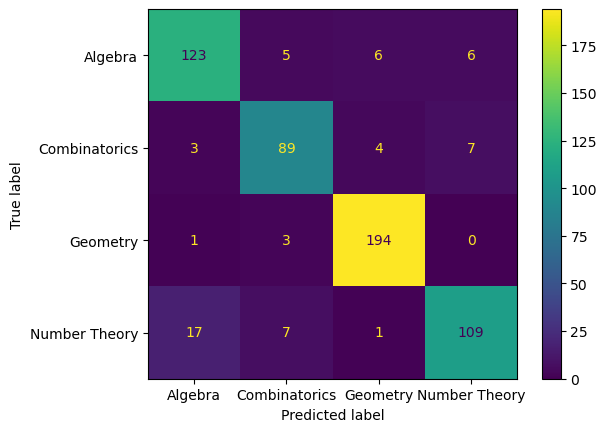

In [4]:
# Preprocess text data (Representation text to numeric)
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(X)

# Split training and test 
X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.2, random_state=2)

# Train the Naive Bayes model with train dataset
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Overall accuracy model:")
print(f"Accuracy  = {accuracy*100:<.3f}%")
print(f"Precision = {precision*100:<.3f}%")
print(f"Recall    = {recall*100:<.3f}%")
print(f"F1-score  = {f1*100:<.3f}%\n")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create heatmap for cm
heatmap = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)

labels = np.unique(y_test)  # ["Algebra", "Combinatorics", "Geometry", "Number Theory"]

# Accuracy model for each label
print("Accuracy model for each label:")
for label in labels:
    idx = np.where(model.classes_ == label)[0][0]
    label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
    print(f"{label:<14s}= {label_accuracy*100:.3f}%")
print()

# Plot the cm to heatmap
heatmap.plot()
plt.show()


Model berhasil dibuat

Markicob sampel pada data yang belum terlabel

In [5]:
data_isnull = data[data['label'].isnull()]
data_isnull.reset_index(drop=True, inplace=True)

temp = data_isnull.sample(5)



In [5]:
# For new predict
sample = ['In a country every 2 cities are connected either by a direct bus route or a direct plane flight. A $clique$ is a set of cities such that every 2 cities in the set are connected by a direct flight. A $cluque$ is a set of cities such that every 2 cities in the set are connected by a direct flight, and every 2 cities in the set are connected to the same number of cities by a bus route. A $claque$ is a set of cities such that every 2 cities in the set are connected by a direct flight, and every 2 numbers of bus routes from a city in the set are different. Prove that the number of cities of any clique is at most the product of the biggest possible number of cities in a cluque and the the biggest possible number of cities in a claque.  Tuymaada 2017 Q3 Juniors']
processed = vectorizer.transform(sample)
pred = model.predict_proba(processed)

class_labels = model.classes_
class_probabilities = {class_labels[i]: pred[0][i] * 100 for i in range(len(class_labels))}
print(class_probabilities)

sorted_class_probabilities = {label: class_probabilities[label] for label in ['Algebra', 'Combinatorics', 'Geometry', 'Number Theory']}
print(sorted_class_probabilities)

print()
for label, prob in zip(class_labels, pred[0]):
    print(f"{label:<14s}= {prob*100:.2f}%")
    

{'Algebra': 11.32051109169855, 'Combinatorics': 63.250297702448954, 'Geometry': 7.263803834766382, 'Number Theory': 18.165387371086315}
{'Algebra': 11.32051109169855, 'Combinatorics': 63.250297702448954, 'Geometry': 7.263803834766382, 'Number Theory': 18.165387371086315}

Algebra       = 11.32%
Combinatorics = 63.25%
Geometry      = 7.26%
Number Theory = 18.17%


In [28]:
temp.iloc[1, :].post_canonical

'In a country every 2 cities are connected either by a direct bus route or a direct plane flight. A $clique$ is a set of cities such that every 2 cities in the set are connected by a direct flight. A $cluque$ is a set of cities such that every 2 cities in the set are connected by a direct flight, and every 2 cities in the set are connected to the same number of cities by a bus route. A $claque$ is a set of cities such that every 2 cities in the set are connected by a direct flight, and every 2 numbers of bus routes from a city in the set are different. Prove that the number of cities of any clique is at most the product of the biggest possible number of cities in a cluque and the the biggest possible number of cities in a claque.  Tuymaada 2017 Q3 Juniors'